<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Useful-Inputs" data-toc-modified-id="Useful-Inputs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Useful Inputs</a></span></li><li><span><a href="#Obtaining-Dataset-&amp;-Train-Test-Split" data-toc-modified-id="Obtaining-Dataset-&amp;-Train-Test-Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtaining Dataset &amp; Train-Test Split</a></span></li><li><span><a href="#Creating-a-Neural-Network" data-toc-modified-id="Creating-a-Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating a Neural Network</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Evaluating-the-Trained-Model" data-toc-modified-id="Evaluating-the-Trained-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating the Trained Model</a></span></li><li><span><a href="#Saving-it-for-later" data-toc-modified-id="Saving-it-for-later-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Saving it for later</a></span></li></ul></div>

Most of this code can be found at <a href='https://keras.io'>keras.io</a>

# Useful Inputs

In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import numpy as np

np.random.seed(27)

In [2]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training, validation, and testing
x_train, x_test, y_train, y_test = train_test_split(
                                    x_scaled, y, 
                                    test_size=0.2, random_state=2
)
cut_off = int(len(x_train) * 0.9)

x_valid, x_train = x_train[:cut_off] , x_train[cut_off:] 
y_valid, y_train = y_train[:cut_off], y_train[cut_off:]

In [5]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [6]:
from tensorflow.keras.models import Sequential

model = Sequential()

The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

For `softmax` the network is configured to output N values, one for each class in the classification task, and the softmax function is used to normalize the outputs, converting them from weighted sum values into probabilities that sum to one. Each value in the output of the softmax function is interpreted as the probability of membership for each class.

Sigmoid would be inappropriate for a multi-classification output.

In [7]:
from keras.layers import Dense

model.add(Dense(units=30, activation='relu', input_dim=4))
# Use a 2nd hidden layer for more parameters & complexity
# model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Compile the model to a form that the computer can more easily work with. Compile specifies a [loss](https://keras.io/api/losses/), [metrics](https://keras.io/api/metrics/) and [optimizer](https://keras.io/api/optimizers/) function. 

**[On optimizers](https://www.kaggle.com/residentmario/keras-optimizers):** Every time a neural network finishes passing a batch through the network and generating prediction results, it must decide how to use the difference between the results it got and the values it knows to be true to adjust the weights on the nodes so that the network steps towards a solution. The algorithm that determines that step is known as the optimization algorithm.

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

/Users/amberyandow/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 30)                150       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 3)                 93        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

# Training the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [10]:
history = model.fit(x_train, y_train, 
                    epochs=500, #batch_size=256,
                    validation_data = (x_valid, y_valid)
                    # validation_split=0.2 # Optionally use a split here
)

Epoch 1/500
1/1 [==============================] - 0s 434ms/step - loss: 1.4922 - accuracy: 0.0000e+00 - val_loss: 1.4545 - val_accuracy: 0.0556
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 1.4876 - accuracy: 0.0000e+00 - val_loss: 1.4507 - val_accuracy: 0.0556
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 1.4812 - accuracy: 0.0000e+00 - val_loss: 1.4460 - val_accuracy: 0.0556
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 1.4732 - accuracy: 0.0000e+00 - val_loss: 1.4404 - val_accuracy: 0.0556
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 1.4637 - accuracy: 0.0000e+00 - val_loss: 1.4341 - val_accuracy: 0.0556
Epoch 6/500
1/1 [==============================] - 0s 18ms/step - loss: 1.4530 - accuracy: 0.0000e+00 - val_loss: 1.4271 - val_accuracy: 0.0556
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 1.4412 - accuracy: 0.0000e+00 - val_loss: 1.4196 - val_accuracy

1/1 [==============================] - 0s 16ms/step - loss: 0.8404 - accuracy: 0.5833 - val_loss: 1.0437 - val_accuracy: 0.3981
Epoch 59/500
1/1 [==============================] - 0s 16ms/step - loss: 0.8333 - accuracy: 0.5833 - val_loss: 1.0392 - val_accuracy: 0.3981
Epoch 60/500
1/1 [==============================] - 0s 16ms/step - loss: 0.8264 - accuracy: 0.5833 - val_loss: 1.0347 - val_accuracy: 0.4074
Epoch 61/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8197 - accuracy: 0.5833 - val_loss: 1.0304 - val_accuracy: 0.4074
Epoch 62/500
1/1 [==============================] - 0s 16ms/step - loss: 0.8131 - accuracy: 0.5833 - val_loss: 1.0261 - val_accuracy: 0.4074
Epoch 63/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8067 - accuracy: 0.5833 - val_loss: 1.0220 - val_accuracy: 0.4167
Epoch 64/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8004 - accuracy: 0.5833 - val_loss: 1.0179 - val_accuracy: 0.4167
Epoch 65/500
1/1 [========

1/1 [==============================] - 0s 17ms/step - loss: 0.5973 - accuracy: 0.8333 - val_loss: 0.8697 - val_accuracy: 0.5463
Epoch 117/500
1/1 [==============================] - 0s 17ms/step - loss: 0.5950 - accuracy: 0.8333 - val_loss: 0.8677 - val_accuracy: 0.5556
Epoch 118/500
1/1 [==============================] - 0s 24ms/step - loss: 0.5926 - accuracy: 0.8333 - val_loss: 0.8657 - val_accuracy: 0.5556
Epoch 119/500
1/1 [==============================] - 0s 22ms/step - loss: 0.5903 - accuracy: 0.8333 - val_loss: 0.8637 - val_accuracy: 0.5556
Epoch 120/500
1/1 [==============================] - 0s 23ms/step - loss: 0.5881 - accuracy: 0.8333 - val_loss: 0.8617 - val_accuracy: 0.5556
Epoch 121/500
1/1 [==============================] - 0s 23ms/step - loss: 0.5858 - accuracy: 0.8333 - val_loss: 0.8598 - val_accuracy: 0.5463
Epoch 122/500
1/1 [==============================] - 0s 25ms/step - loss: 0.5836 - accuracy: 0.8333 - val_loss: 0.8578 - val_accuracy: 0.5463
Epoch 123/500
1/1 [=

Epoch 174/500
1/1 [==============================] - 0s 16ms/step - loss: 0.4968 - accuracy: 0.8333 - val_loss: 0.7743 - val_accuracy: 0.5926
Epoch 175/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4955 - accuracy: 0.8333 - val_loss: 0.7729 - val_accuracy: 0.6019
Epoch 176/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4942 - accuracy: 0.8333 - val_loss: 0.7715 - val_accuracy: 0.6019
Epoch 177/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4929 - accuracy: 0.8333 - val_loss: 0.7702 - val_accuracy: 0.6019
Epoch 178/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4917 - accuracy: 0.8333 - val_loss: 0.7688 - val_accuracy: 0.6019
Epoch 179/500
1/1 [==============================] - 0s 16ms/step - loss: 0.4904 - accuracy: 0.8333 - val_loss: 0.7675 - val_accuracy: 0.5926
Epoch 180/500
1/1 [==============================] - 0s 16ms/step - loss: 0.4892 - accuracy: 0.8333 - val_loss: 0.7662 - val_accuracy: 0.5926
Epoch 

Epoch 232/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4349 - accuracy: 0.8333 - val_loss: 0.7054 - val_accuracy: 0.6111
Epoch 233/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4340 - accuracy: 0.8333 - val_loss: 0.7044 - val_accuracy: 0.6111
Epoch 234/500
1/1 [==============================] - 0s 16ms/step - loss: 0.4331 - accuracy: 0.8333 - val_loss: 0.7033 - val_accuracy: 0.6111
Epoch 235/500
1/1 [==============================] - 0s 16ms/step - loss: 0.4322 - accuracy: 0.8333 - val_loss: 0.7023 - val_accuracy: 0.6111
Epoch 236/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4314 - accuracy: 0.8333 - val_loss: 0.7013 - val_accuracy: 0.6111
Epoch 237/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4305 - accuracy: 0.8333 - val_loss: 0.7002 - val_accuracy: 0.6111
Epoch 238/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4296 - accuracy: 0.8333 - val_loss: 0.6992 - val_accuracy: 0.6111
Epoch 

Epoch 290/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3893 - accuracy: 0.8333 - val_loss: 0.6506 - val_accuracy: 0.6296
Epoch 291/500
1/1 [==============================] - 0s 17ms/step - loss: 0.3886 - accuracy: 0.9167 - val_loss: 0.6497 - val_accuracy: 0.6296
Epoch 292/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3879 - accuracy: 0.9167 - val_loss: 0.6488 - val_accuracy: 0.6296
Epoch 293/500
1/1 [==============================] - 0s 17ms/step - loss: 0.3872 - accuracy: 0.9167 - val_loss: 0.6480 - val_accuracy: 0.6296
Epoch 294/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3865 - accuracy: 0.9167 - val_loss: 0.6471 - val_accuracy: 0.6296
Epoch 295/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3858 - accuracy: 0.9167 - val_loss: 0.6462 - val_accuracy: 0.6296
Epoch 296/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3851 - accuracy: 0.9167 - val_loss: 0.6454 - val_accuracy: 0.6389
Epoch 

Epoch 348/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3522 - accuracy: 1.0000 - val_loss: 0.6033 - val_accuracy: 0.6481
Epoch 349/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3516 - accuracy: 1.0000 - val_loss: 0.6025 - val_accuracy: 0.6481
Epoch 350/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3510 - accuracy: 1.0000 - val_loss: 0.6018 - val_accuracy: 0.6481
Epoch 351/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3505 - accuracy: 1.0000 - val_loss: 0.6010 - val_accuracy: 0.6481
Epoch 352/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3499 - accuracy: 1.0000 - val_loss: 0.6003 - val_accuracy: 0.6481
Epoch 353/500
1/1 [==============================] - 0s 15ms/step - loss: 0.3493 - accuracy: 1.0000 - val_loss: 0.5995 - val_accuracy: 0.6481
Epoch 354/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3487 - accuracy: 1.0000 - val_loss: 0.5987 - val_accuracy: 0.6481
Epoch 

Epoch 406/500
1/1 [==============================] - 0s 15ms/step - loss: 0.3209 - accuracy: 1.0000 - val_loss: 0.5618 - val_accuracy: 0.6852
Epoch 407/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3204 - accuracy: 1.0000 - val_loss: 0.5611 - val_accuracy: 0.6852
Epoch 408/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3199 - accuracy: 1.0000 - val_loss: 0.5604 - val_accuracy: 0.6852
Epoch 409/500
1/1 [==============================] - 0s 15ms/step - loss: 0.3194 - accuracy: 1.0000 - val_loss: 0.5598 - val_accuracy: 0.6852
Epoch 410/500
1/1 [==============================] - 0s 15ms/step - loss: 0.3189 - accuracy: 1.0000 - val_loss: 0.5591 - val_accuracy: 0.6852
Epoch 411/500
1/1 [==============================] - 0s 15ms/step - loss: 0.3184 - accuracy: 1.0000 - val_loss: 0.5584 - val_accuracy: 0.6852
Epoch 412/500
1/1 [==============================] - 0s 16ms/step - loss: 0.3179 - accuracy: 1.0000 - val_loss: 0.5578 - val_accuracy: 0.6852
Epoch 

Epoch 464/500
1/1 [==============================] - 0s 15ms/step - loss: 0.2929 - accuracy: 1.0000 - val_loss: 0.5245 - val_accuracy: 0.7222
Epoch 465/500
1/1 [==============================] - 0s 15ms/step - loss: 0.2925 - accuracy: 1.0000 - val_loss: 0.5238 - val_accuracy: 0.7222
Epoch 466/500
1/1 [==============================] - 0s 16ms/step - loss: 0.2920 - accuracy: 1.0000 - val_loss: 0.5232 - val_accuracy: 0.7222
Epoch 467/500
1/1 [==============================] - 0s 15ms/step - loss: 0.2915 - accuracy: 1.0000 - val_loss: 0.5226 - val_accuracy: 0.7222
Epoch 468/500
1/1 [==============================] - 0s 16ms/step - loss: 0.2911 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.7222
Epoch 469/500
1/1 [==============================] - 0s 15ms/step - loss: 0.2906 - accuracy: 1.0000 - val_loss: 0.5214 - val_accuracy: 0.7222
Epoch 470/500
1/1 [==============================] - 0s 16ms/step - loss: 0.2902 - accuracy: 1.0000 - val_loss: 0.5208 - val_accuracy: 0.7315
Epoch 

In [ ]:
# alternatively could have specified a specific batch to train on
# model.train_on_batch(x_batch, y_batch)

In [11]:
weights, biases = model.layers[0].get_weights()

print('Weights:\n', weights)
print()
print('Biases:\n', biases)

Weights:
 [[ 0.1569561   0.394767    0.26069272  0.11085547  0.10841848  0.12357521
   0.0226829   0.21533805 -0.41132662  0.3713899  -0.17221689 -0.1293218
   0.19827442 -0.0658451  -0.19697206  0.39728948 -0.03390318 -0.06169968
   0.08316299  0.06300118  0.19619006 -0.24035344  0.16560946  0.29391915
  -0.4086256   0.02635567 -0.30773464  0.3377133  -0.16544005  0.04594629]
 [-0.27543253 -0.0424483   0.1784971  -0.06078897  0.3335699   0.35372943
  -0.23511958  0.27432808 -0.21819036 -0.13631745 -0.01940249 -0.3268805
   0.00104894  0.13038494 -0.22395216 -0.10945529  0.21690334 -0.42385748
  -0.30270877  0.16502656  0.03356233 -0.02865732 -0.1494655   0.00313359
   0.0391233  -0.17406304  0.02800589 -0.40967485  0.08730655 -0.19129376]
 [-0.3984517  -0.41125527  0.00536411 -0.36663988 -0.560606   -0.05737343
   0.2137177  -0.11969163 -0.24469773  0.23064853  0.20154905 -0.04491046
  -0.17684954 -0.2867819   0.3169668  -0.0692732  -0.24965835 -0.11984838
   0.08783693 -0.0449794  -0

# Evaluating the Trained Model

In [16]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.492153,0.0,1.454496,0.055556
1,1.487615,0.0,1.450737,0.055556
2,1.481216,0.0,1.446002,0.055556
3,1.473163,0.0,1.440419,0.055556
4,1.463690,0.0,1.434093,0.055556


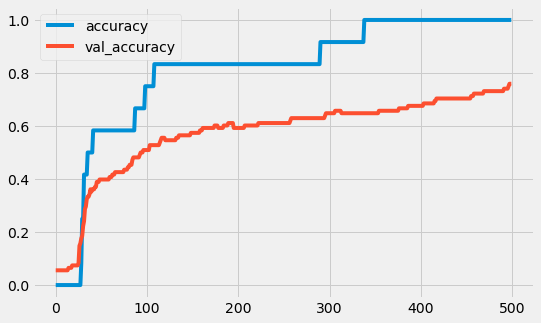

In [15]:
df = pd.DataFrame(history.history)
columns = ['accuracy', 'val_accuracy']

df[columns].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

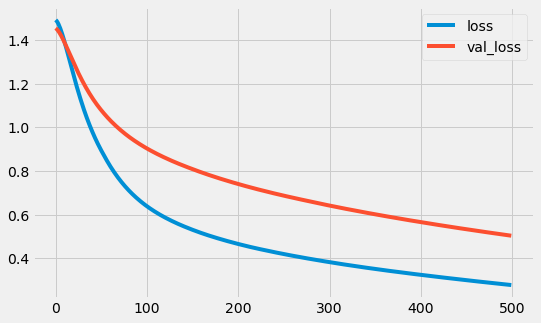

In [17]:
df = pd.DataFrame(history.history)
columns = ['loss', 'val_loss']

df[columns].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

We can look at the overall loss from our test data after training the model was trained

In [18]:
# Could also just use a batch to evaluate
# loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)

loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

1/1 [==============================] - 0s 15ms/step - loss: 0.3710 - accuracy: 0.8667


[0.37096744775772095, 0.8666666746139526]

We can have predictions (probability the data point is a particular class based on our trained model)

In [19]:
classes = model.predict(x_test)

classes

array([[0.9829584 , 0.00995784, 0.0070838 ],
       [0.9787654 , 0.01269278, 0.00854177],
       [0.0388788 , 0.47517148, 0.48594972],
       [0.97985864, 0.01161486, 0.00852659],
       [0.9733291 , 0.01476868, 0.01190224],
       [0.06264996, 0.61917794, 0.31817213],
       [0.9683801 , 0.01846033, 0.0131596 ],
       [0.02967469, 0.5952555 , 0.3750699 ],
       [0.04168391, 0.45701078, 0.50130534],
       [0.972605  , 0.01686144, 0.01053361],
       [0.9817385 , 0.00841553, 0.00984592],
       [0.9855569 , 0.00869527, 0.00574784],
       [0.9826956 , 0.00938403, 0.00792043],
       [0.97348344, 0.01352104, 0.01299554],
       [0.22265701, 0.48051456, 0.29682845],
       [0.07922739, 0.6160129 , 0.30475974],
       [0.957318  , 0.02862026, 0.01406182],
       [0.15423511, 0.57953185, 0.26623312],
       [0.05581926, 0.36883005, 0.57535076],
       [0.12502585, 0.6050461 , 0.26992813],
       [0.08140545, 0.55926716, 0.3593274 ],
       [0.11328521, 0.63687426, 0.24984048],
       [0.

We want to say what is the predicted class, so we pick just the largest probability for each result

In [20]:
predictions = np.argmax(classes, axis=1)

predictions

array([0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 0, 1])

Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

In [21]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86666667])

# Saving it for later

In [22]:
model.save("my_model.h5")

NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.

In [23]:
loaded_model = keras.models.load_model("my_model.h5")

ValueError: No model found in config file.

## Review 
- function of a perceptron from inputs to outputs = `output = activation(dot(inputs, weights) + bias)`
- Forward Propagation - transformations from each node propagate to the next layers nodes. 
- Back-propagation - Updating weights and bias based on residuals 
- What is an activation function? 
- What is an optimizer? 